# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
titanic= pd.read_csv('Titanic_survival.csv',index_col='PassengerId')
test= pd.read_csv('test.csv',index_col='PassengerId')

#  Basic EDA

In [3]:
print("Shape of titanic servival", titanic.shape)
print("Shape of Test", test.shape)

Shape of titanic servival (418, 1)
Shape of Test (418, 10)


In [4]:
titanic.columns

Index(['Survived'], dtype='object')

In [5]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [7]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Combining titanic and train datasets on PassengerId
data=pd.merge(titanic, test, on='PassengerId')

In [9]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
data.isnull().sum() #Checking if null values are present in the given data set

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [11]:
# Function for only see the null variabes
def print_null(df):
    for col in df:
        if df[col].isnull().any():
            print('%s has %.0f null values: %.3f%%'%(col, df[col].isnull().sum(), df[col].isnull().sum()/df[col].count()*100))

In [12]:
print_null(data)

Age has 86 null values: 25.904%
Fare has 1 null values: 0.240%
Cabin has 327 null values: 359.341%


In [13]:
data=data.drop(['Cabin'],axis=1) # Dropping cabin variable

In [14]:
#I have Created dummy variables for Sex for male:1  and female:0 as SexNum
data['SexNum']=(data['Sex']== 'male')+0 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Survived    418 non-null int64
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
SexNum      418 non-null int32
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 37.6+ KB


# a. Survival Rate

In [16]:
data.groupby('Survived')['Survived'].count()

Survived
0    266
1    152
Name: Survived, dtype: int64

In [17]:
survival=data.groupby('Survived')['Survived'].count()

In [18]:
survival[0] #no of passengers not survived

266

In [19]:
survival[1] # no of passengers survived

152

In [20]:
Survival_Rate = round(survival[1]/(survival[1]+survival[0]),3)*100

In [21]:
print('Survival rate is',Survival_Rate)

Survival rate is 36.4


 `Survival Rate is 36.4`

# b.
    1. According to given dataset  No Male Was Survived
    2. In Pclass 57, 63, 146 members were not survived 
    3. In total Parch 266 people were not survived
          0        225
          1         24
          2         13
          3          1
          5          1
          6          1
          9          1
    
    4. Family size is also not effecting much because all the female were survived and all the male were not survived
    5. People whose fare was 0 was not survived

In [22]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'SexNum'],
      dtype='object')

In [23]:
pd.crosstab(data.Survived, data.Pclass)

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


In [24]:
data.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          57
          2          63
          3         146
1         1          50
          2          30
          3          72
dtype: int64

In [25]:
data.groupby(['Survived','Parch']).size()

Survived  Parch
0         0        225
          1         24
          2         13
          3          1
          5          1
          6          1
          9          1
1         0         99
          1         28
          2         20
          3          2
          4          2
          9          1
dtype: int64

In [26]:
data[data.Fare==0] # Checking for number of survivals with free of cost travelling

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexNum
PassengerId,,,,,,,,,,,
1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,S,1
1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,S,1


In [27]:
data[data.Fare==data.Fare.max()] # checking if the maximum fare paid passenger is survived

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexNum
PassengerId,,,,,,,,,,,
1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,0


In [28]:
data[data.Fare<data.Fare.median()].groupby(['Survived']).size() # the passengers who has paid less than the median

Survived
0    152
1     55
dtype: int64

In [29]:
# dispersion measures
print('Min fare : {0}'.format(data.Fare.min())) # minimum
print('Max fare : {0}'.format(data.Fare.max())) # maximum
print('Fare range : {0}'.format(data.Fare.max()  - data.Fare.min())) # range
print('25 percentile : {0}'.format(data.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(data.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(data.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(data.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(data.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.5
Variance fare : 3125.6570743195775
Standard deviation fare : 55.90757617997383


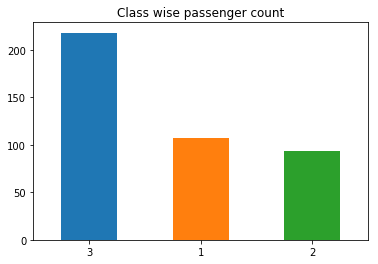

In [30]:
data.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count')

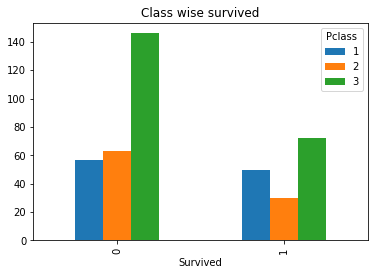

In [31]:
pd.crosstab(data.Survived, data.Pclass).plot(kind='bar', title='Class wise survived')

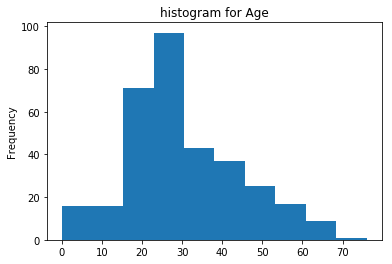

In [32]:
data.Age.plot(kind='hist', title='histogram for Age')

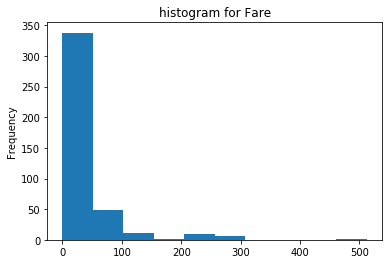

In [33]:
data.Fare.plot(kind='hist', title='histogram for Fare')

In [34]:
# Calculating Skewness
print('skewness for age : {0:.2f}'.format(data.Age.skew()))
print('skewness for fare : {0:.2f}'.format(data.Fare.skew()))

skewness for age : 0.46
skewness for fare : 3.69


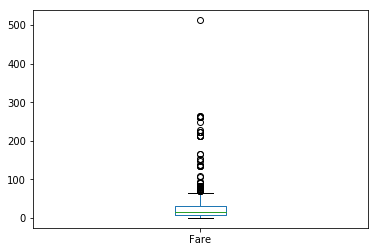

In [35]:
data.Fare.plot(kind='box')

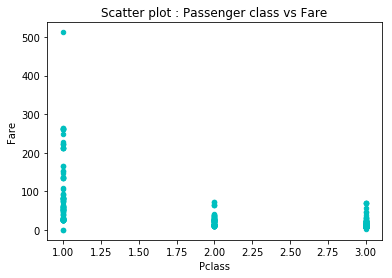

In [36]:
data.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare');

In [37]:
data.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,75.24585,90.00000,51.67085
2,15.04580,11.52915,21.00000
3,7.22920,7.75000,8.05000


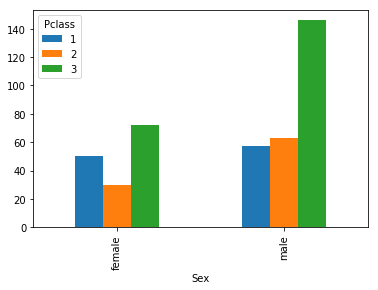

In [38]:
pd.crosstab(data.Sex, data.Pclass).plot(kind='bar')

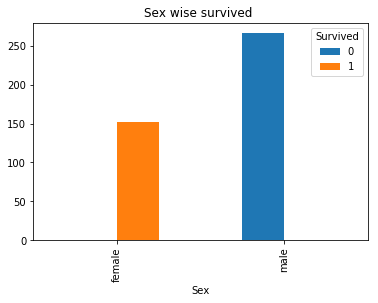

In [39]:
pd.crosstab(data.Sex,data.Survived).plot(kind='bar', title='Sex wise survived ')

In [40]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,SexNum
Survived,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514,-1.000000
Pclass,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.108615
Age,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932,0.000013
SibSp,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539,-0.099943
Parch,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046,-0.159120
Fare,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000,-0.191514
SexNum,-1.000000,0.108615,0.000013,-0.099943,-0.159120,-0.191514,1.000000


In [41]:
data.corr()['Survived']

Survived    1.000000
Pclass     -0.108615
Age        -0.000013
SibSp       0.099943
Parch       0.159120
Fare        0.191514
SexNum     -1.000000
Name: Survived, dtype: float64

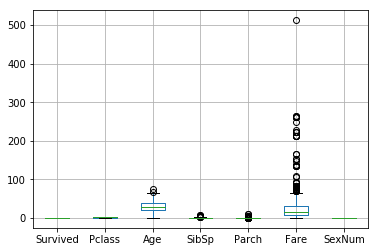

In [42]:
data.boxplot()

In [43]:
data.corr()['Survived'] # correlation

Survived    1.000000
Pclass     -0.108615
Age        -0.000013
SibSp       0.099943
Parch       0.159120
Fare        0.191514
SexNum     -1.000000
Name: Survived, dtype: float64

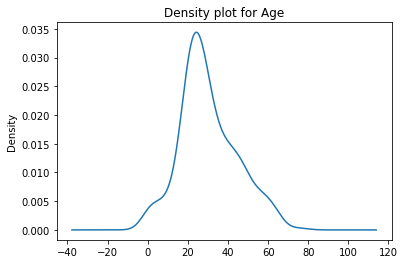

In [44]:
# use kde for density plot
#Kernel Density Estimation
data.Age.plot(kind='kde', title='Density plot for Age')

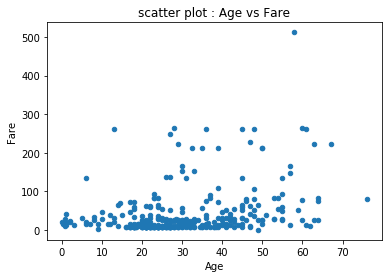

In [45]:
data.plot.scatter(x='Age', y='Fare', title='scatter plot : Age vs Fare')

In [46]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [47]:
data.groupby(['Pclass']).agg(aggregations)

Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       94.280297     60.0000  512.3292   0.0000       42.0    6.00    76.0   
2       22.202104     15.7500   73.5000   9.6875       26.5    0.92    63.0   
3       12.459678      7.8958   69.5500   3.1708       24.0    0.17    60.5   

                  
       range_Age  
Pclass            
1          70.00  
2          62.08  
3          60.33

In [48]:
data.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,41.333333,24.376552,23.073400
male,40.520000,30.940678,24.525104


# Dealing with missing values

In [49]:
data[data.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexNum
PassengerId,,,,,,,,,,,
1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,1


In [50]:
data.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           110.073511
        Q            90.000000
        S            76.677504
2       C            20.120445
        Q            11.273950
        S            23.056090
3       C            10.658700
        Q             8.998985
        S            13.913030
Name: Fare, dtype: float64

In [51]:
data.groupby(['Pclass', 'Embarked'])['Fare'].median()

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [52]:
data.Fare[data.Fare.isnull()]=52 # Here I am imputing null value with 52 because the median in embarked  s and pclass in 1 is 51

In [53]:
pclass_age_median = data.groupby('Pclass').Age.transform('median')
data.Age.fillna(pclass_age_median , inplace=True) # Imputing null values with median wrt to pclass

In [54]:
print_null(data) #Again Checkng for any null values are present

## Feature : FamilySize

In [55]:
# Family : Adding Parents with Siblings
data['FamilySize'] = data.Parch + data.SibSp + 1 # 1 for self

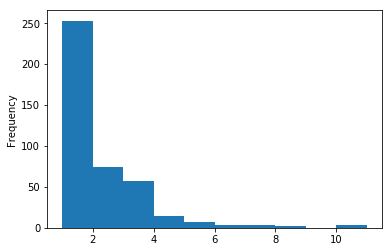

In [56]:
data['FamilySize'].plot(kind='hist')

In [57]:
# further explore this family with max family members
data.loc[data.FamilySize == data.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
1080,"Sage, Miss. Ada",1,11,CA. 2343
1234,"Sage, Mr. John George",0,11,CA. 2343
1252,"Sage, Master. William Henry",0,11,CA. 2343
1257,"Sage, Mrs. John (Annie Bullen)",1,11,CA. 2343


# Feature : IsMother

In [58]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


In [59]:
# create Title feature
data['Title'] =  data.Name.map(lambda x : GetTitle(x))

In [60]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
data['IsMother'] = np.where(((data.Sex == 'female') & (data.Parch > 0) & (data.Age > 18) & (data.Title != 'Miss')), 1, 0)

In [61]:
pd.crosstab(data.Survived, data.IsMother)

IsMother,0,1
Survived,,
0,266,0
1,122,30


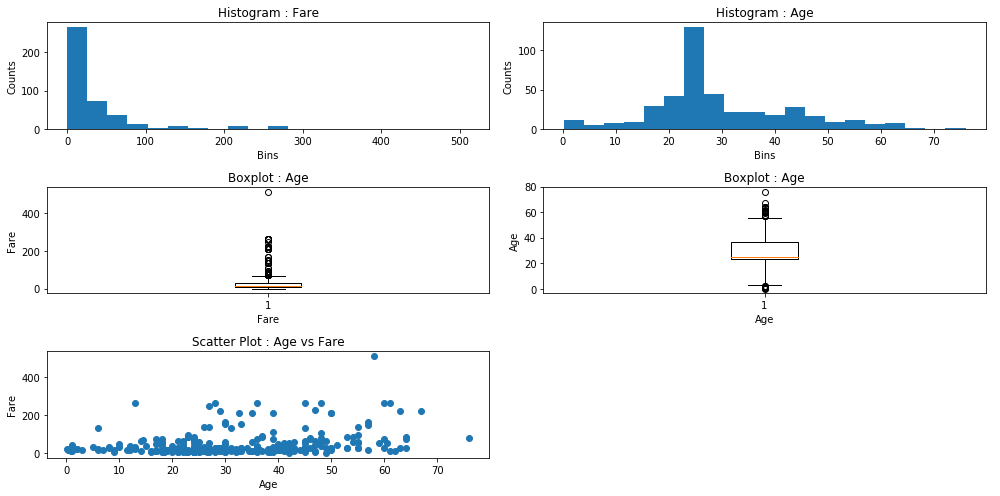

In [62]:
 # Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(data.Fare, bins=20)
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(data.Age, bins=20)
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(data.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(data.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(data.Age, data.Fare)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()

In [63]:
# family size 
family_survived = pd.crosstab(data.FamilySize, data.Survived)
print(family_survived)

Survived      0   1
FamilySize         
1           185  68
2            38  36
3            27  30
4             4  10
5             5   2
6             1   2
7             3   1
8             1   1
11            2   2


In [64]:
family_survived.columns = ['Not Survived', 'Survived']

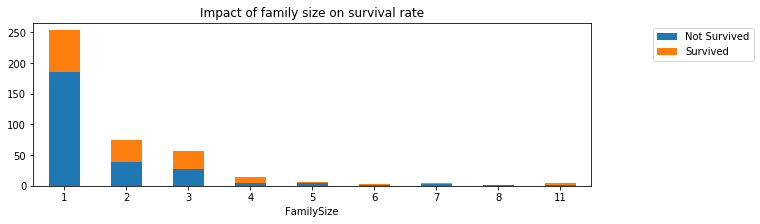

In [65]:
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True,ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

#  c
1. It is clearly showing that The sex is explaining the most survived. The correlation is 1 between Sex and Survived. 
2. More passengers are trevelling in Pclass 3 and survival rate in Plass is less
3. Survival rate in Pclass 1 is more
4. Very less people paid between 200-300 and only one person paid 500 who was in Pclass 1
5. More male are trevelling in Pclass 3
6. Pclass 2 survival rate is also very less
7. Only few families are travelling compare to individuals
8. Approxmatley 30 mothers are travelling in the ship
9. Individual passengers has highest rate of survival
10. Because 'Sex' is playing major role in survival according to the given data set. We can say that in the future the survival rate for female is 100% and the survival rate for male is zero percent.

In [66]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexNum,FamilySize,Title,IsMother
PassengerId,,,,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,Mr,0
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2,Mrs,0
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,Mr,0
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,1,Mr,0
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,3,Mrs,1
